## Simulação de Monte Carlo

In [1]:
# Pacote para simulação de Monte Carlo em Python. Só funciona com Python 2.7
# !pip install montecarlo

In [2]:
from random import random
from math import pow, sqrt

In [3]:
# Simulação de Monte Carlo para detemrinar o valor de pi.
DARTS = 1000000
hits = 0
throws = 0
for i in range (1, DARTS):
    throws += 1
    x = random()
    y = random()
    dist = sqrt(pow(x, 2) + pow(y, 2))
    if dist <= 1.0:
        hits = hits + 1.0

# hits / throws = 1/4 Pi
pi = 4 * (hits / throws)

print ("pi = %s" %(pi))

pi = 3.138351138351138


## Projetando o Comportamento das Ações com Simulação de Monte Carlo

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [5]:
# Definido as variáveis

# Número de dias de funcionamento do mercado de ações
T = 250 

# Retorno esperado
mu = 0.09

# Volatilidade - Experimente alterar este parâmetro e ver o resultado da simulação
vol = 0.1 

In [6]:
# Calculando o retorno de um dia no mercado de ações
daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1

In [7]:
# Definindo o preço da ação e simulando para diversos dias
price_list = [200]
for x in daily_returns:
    price_list.append(price_list[-1]*x)

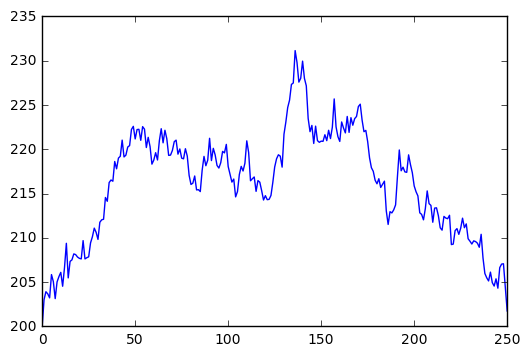

In [8]:
# Plots
plt.plot(price_list)
#plt.hist(daily_returns-1, 100) 
plt.show()

## Projetando o Preço das Ações com Simulação de Monte Carlo

In [9]:
import datetime
from random import gauss
from math import exp, sqrt

def generate_asset_price(S,v,r,T):
    return S * exp((r - 0.5 * v**2) * T + v * sqrt(T) * gauss(0,1.0))

def call_payoff(S_T,K):
    return max(0.0,S_T-K)

S = 857.29 # preço
v = 0.2076 # volume de 20.76%
r = 0.0014 # rate de 0.14%
T = (datetime.date(2013,9,21) - datetime.date(2013,9,3)).days / 365.0
K = 860.
simulations = 90000
payoffs = []
discount_factor = math.exp(-r * T)

for i in range(simulations):
    S_T = generate_asset_price(S,v,r,T)
    payoffs.append(
        call_payoff(S_T, K)
    )

price = discount_factor * (sum(payoffs) / float(simulations))
print ('Price: %.4f' % price)

Price: 14.5089


## Projeção do Valor de um Ativo

In [10]:
import numpy as np 
import pylab as pl

In [11]:
# Variáveis

# Número de caminhos
M = 1000

# Número de passos
N = 50

# Horizonte de tempo de simulação
T = 1.0 

# Volatilidade anual
sigma = 0.3 

# Drift rate
mu = 0.05

# Tempo de simulação
dt = T/N

# Preço do ativo S
S0 = 100


In [12]:
# Matriz onde nós armazenamos todos os trajetos do preço do ativo
# Perceba que a primeira coluna é o preço inicial do ativo (S0)
S = np.zeros((M,N+1))
S[:,0] = S0

In [13]:
# Começamos com uma implementação direta do algoritmo sem qualquer tentativa de otimizar o desempenho. 
# Aqui aninhamos dois loops. O exterior sobre os caminhos M - o interno sobre todos os passos do tempo. 
# Em cada etapa estamos calculando o preço do ativo em função de um sorteio aleatório e o valor no passo anterior. 
# Esta é a equação de propagação (definida ao final do loop):
# S[m,n+1] = S[m,n]*np.exp( (mu-0.5*sigma**2)*dt + eps*sigma*np.sqrt(dt) )
for m in range(M):
  for n in range(N):
    eps = np.random.normal(0, 1, 1)[0]
    S[m,n+1] = S[m,n]*np.exp( (mu-0.5*sigma**2)*dt + eps*sigma*np.sqrt(dt) )

In [14]:
# Esse trecho de código acima é lento. 
# Em nossa máquina de teste leva um pouco mais de 600 ms (mili segundos) para uma matriz de 1000 caminhos e 
# 50 etapas de tempo.
# Primeiro, otimizamos o loop externo. A equação para o passo de propagação funciona perfeitamente bem também em forma de vetor.
# Uma vetorização simples como esta faz maravilhas para o desempenho
# O tempo de execução na nossa máquina é agora apenas cerca de 4,3 ms. 
# Devemos sempre fazer isso como caminhos individuais em uma simulação Monte Carlo.
# É importante ter atenção à dimensão dos arrays. Python assume a multiplicação de vetor elementwise 
# por padrão para matrizes numpy.
for n in range(N):
  eps = np.random.normal(0, 1, (M))
  S[:,n+1] = S[:,n]*np.exp((mu-0.5*sigma**2)*dt + eps*sigma*np.sqrt(dt));

In [15]:
# Podemos também ajustar o loop interno (ao longo do tempo). 
# Todas as entradas, exceto a primeira coluna da matriz, são preenchidas com a alteração relativa no preço do ativo, 
# que calculamos reescrevendo a equação acima, da seguinte maneira:
eps = np.random.normal(0, 1, (M,N))
S[:,1:] = np.exp((mu-0.5*sigma**2)*dt + eps*sigma*np.sqrt(dt))
S = np.cumprod(S, axis = 1)
# Em seguida, realizamos a propagação tomando o produto cumulativo na dimensão de tempo 
# (eixo = 1 para a dimensão da linha). A função cumprod é totalmente vectorizada e portanto muito rápida.

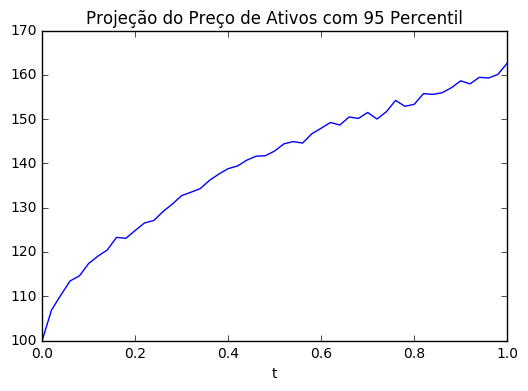

In [17]:
# Plot
pl.plot(np.linspace(0,T,N+1), np.percentile(S, 95, axis = 0))
pl.title('Projeção do Preço de Ativos com 95 Percentil')
pl.xlabel('t')
pl.show()